# Machine Learning Assignment : Project

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time
from math import sqrt
import seaborn as sns
# Import necessary modules
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, precision_score
from sklearn.decomposition import PCA
from sklearn import svm
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, cross_val_predict

# Classifiers list

In [2]:
names = ["K Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(kernel='linear', gamma=0.3, C=2),
    svm.SVC(kernel='rbf', gamma=0.3, C=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(hidden_layer_sizes = (10,1),alpha=1, max_iter=1000, activation='logistic', solver='sgd', learning_rate_init=0.01),
    AdaBoostClassifier(),
    GaussianNB()]

# Data input for training

In [4]:
path_to_file = "FeaturesValues.xlsx"
data = pd.read_excel(path_to_file, header = 2)
print(data.shape)
data.head()

(350, 26)


,Label,10-12500,500-1000,1000-1500,7500-8000,10-12500.1,500-1000.1,1000-1500.1,7500-8000.1,10-12500.2,...,7500-8000.3,10-12500.4,10-12500.5,500-1000.4,500-1000.5,1000-1500.4,1000-1500.5,7500-8000.4,7500-8000.5,PenType
0,0,16.320440,16.320440,7.398460,2.012775,7.423021,3.721272,1.460425,0.875289,22.619635,...,0.789872,0.825667,15.671709,0.122235,7.564780,0.509929,3.430779,0.085417,1.665161,M4
1,0,59.265753,59.265753,4.586654,1.650161,12.452657,8.518008,1.676704,0.587340,28.854146,...,0.186056,1.186097,23.719217,1.594081,15.441935,0.764726,4.118134,0.401284,0.773396,M4
2,0,22.154235,22.154235,11.387735,3.148665,9.549542,4.729822,2.103572,1.102044,14.716988,...,0.490615,1.684450,17.414634,1.714066,7.745578,0.202009,4.409152,0.611429,1.592659,M4
3,1,17.316986,15.316602,17.316986,4.190537,9.976401,2.851924,3.431755,1.216401,19.976927,...,0.292080,1.727819,18.224983,0.178184,5.882032,0.107414,6.970924,0.924322,1.508481,M4
4,1,10.101065,10.101065,5.519555,1.979642,4.513550,1.869357,1.128628,0.480537,33.964781,...,0.330239,9.288578,18.315677,5.398514,9.137228,2.522698,4.779955,0.150298,0.810776,M4


# Visualization of input data

Text(0.5, 0, 'Pen type')

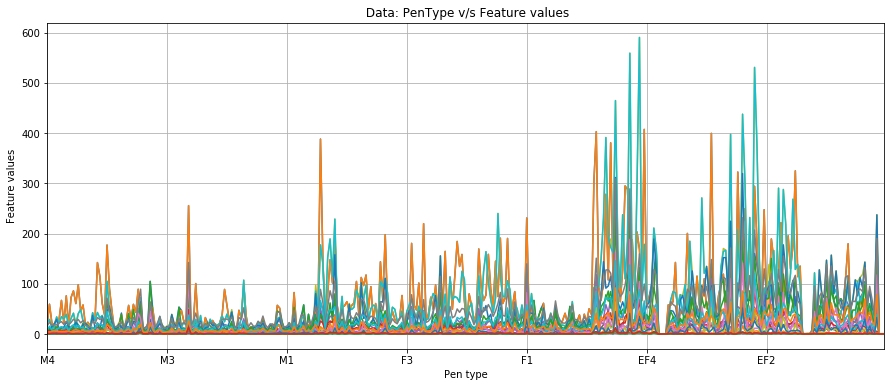

In [5]:
data[:].plot(x='PenType', y = data.columns.drop(['Label','PenType']), figsize=(15,6), grid=True,legend = False)
plt.title(" Data: PenType v/s Feature values")
plt.ylabel('Feature values')
plt.xlabel('Pen type')

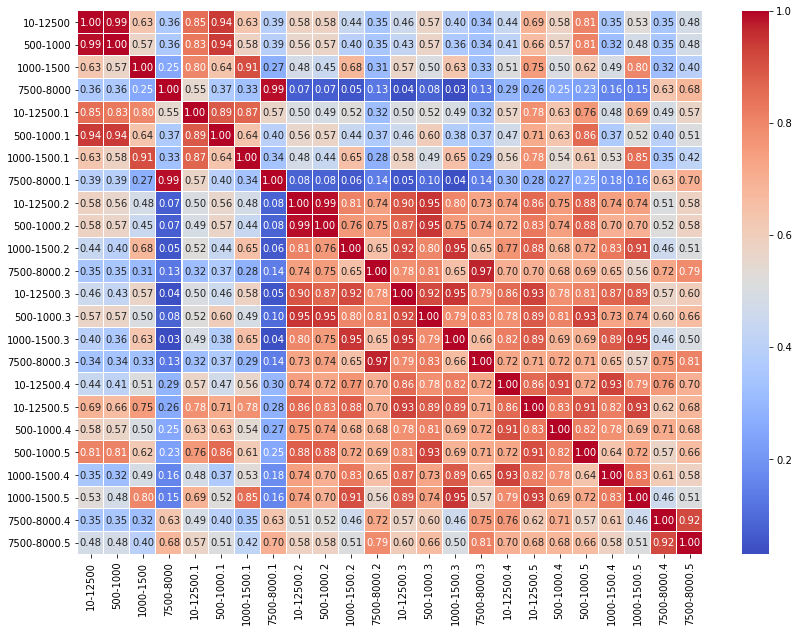

In [16]:
f, ax = plt.subplots(figsize=(14, 10))
corr = data.drop(['Label', 'PenType'], axis=1).corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)

/home/shravanthi/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/shravanthi/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/shravanthi/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `

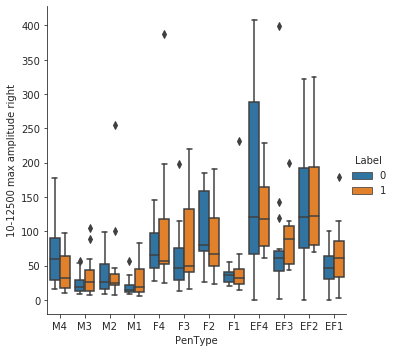

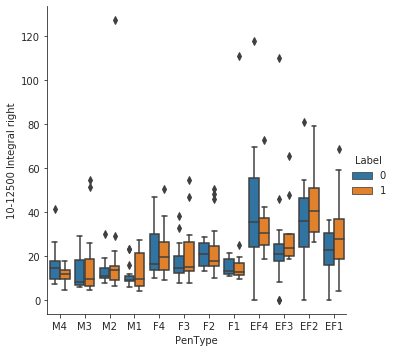

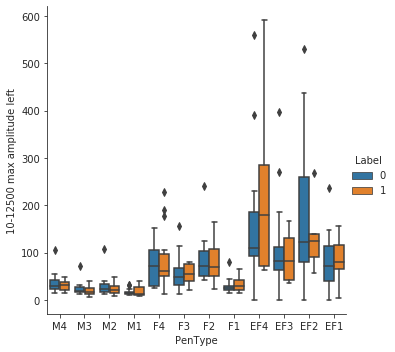

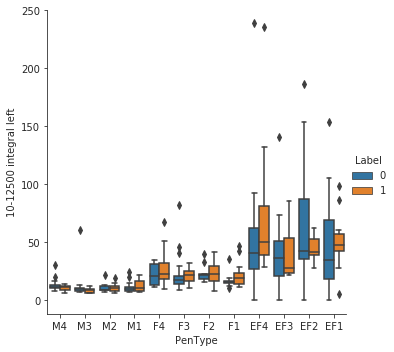

In [15]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("PenType", "10-12500", "Label", data=data, kind="box")
    g.set_axis_labels("PenType", "10-12500 max amplitude right");
    g = sns.factorplot("PenType", "10-12500.1", "Label", data=data, kind="box")
    g.set_axis_labels("PenType", "10-12500 Integral right");
    g = sns.factorplot("PenType", "10-12500.2", "Label", data=data, kind="box")
    g.set_axis_labels("PenType", "10-12500 max amplitude left");
    g = sns.factorplot("PenType", "10-12500.3", "Label", data=data, kind="box")
    g.set_axis_labels("PenType", "10-12500 integral left");
plt.show()

# Case1: No modifications with data, direct classification

In [6]:
'''Creating training and testing data'''

target = data['Label'] #target labels
features = data.drop(['Label','PenType'], axis=1) #features for training

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=1)
print("shape of training features:",x_train.shape)
print("shape of training labels:",y_train.shape)
print("shape of test features:",x_test.shape)
print("shape of test labels:",y_test.shape)

shape of training features: (245, 24)
shape of training labels: (245,)
shape of test features: (105, 24)
shape of test labels: (105,)


K Nearest Neighbors
accuracy score: 47.62
RMS error: 0.72
F1-score:  [0.48 0.48]
precision score:  [0.45 0.5 ]
confusion matrix:
[[25 25]
 [30 25]]
run time: 0.07




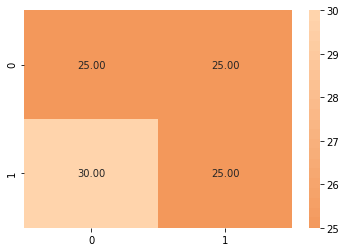

Linear SVM
accuracy score: 52.38
RMS error: 0.69
F1-score:  [0.55 0.5 ]
precision score:  [0.5  0.56]
confusion matrix:
[[30 20]
 [30 25]]
run time: 3.05




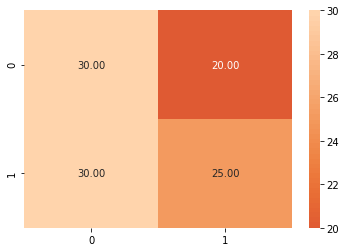

RBF SVM
accuracy score: 47.62
RMS error: 0.72
F1-score:  [0.65 0.  ]
precision score:  [0.48 0.  ]
confusion matrix:
[[50  0]
 [55  0]]
run time: 0.01




/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


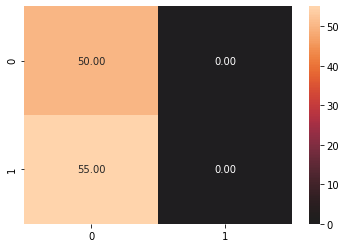

Gaussian Process
accuracy score: 51.43
RMS error: 0.70
F1-score:  [0.52 0.5 ]
precision score:  [0.49 0.54]
confusion matrix:
[[28 22]
 [29 26]]
run time: 1.25




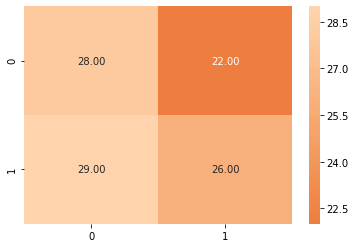

Decision Tree
accuracy score: 57.14
RMS error: 0.65
F1-score:  [0.55 0.59]
precision score:  [0.55 0.59]
confusion matrix:
[[27 23]
 [22 33]]
run time: 0.01




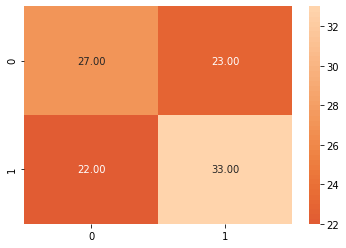

Random Forest
accuracy score: 53.33
RMS error: 0.68
F1-score:  [0.56 0.51]
precision score:  [0.51 0.57]
confusion matrix:
[[31 19]
 [30 25]]
run time: 0.03




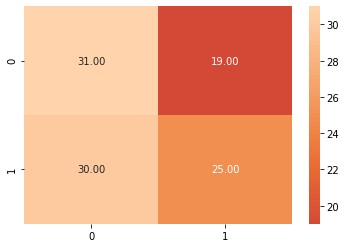

MLP Net
accuracy score: 47.62
RMS error: 0.72
F1-score:  [0.65 0.  ]
precision score:  [0.48 0.  ]
confusion matrix:
[[50  0]
 [55  0]]
run time: 0.30




/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


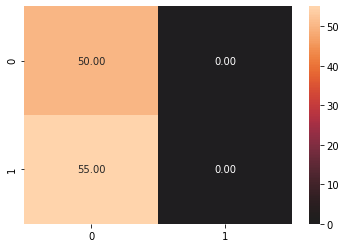

AdaBoost
accuracy score: 54.29
RMS error: 0.68
F1-score:  [0.59 0.49]
precision score:  [0.52 0.59]
confusion matrix:
[[34 16]
 [32 23]]
run time: 0.12




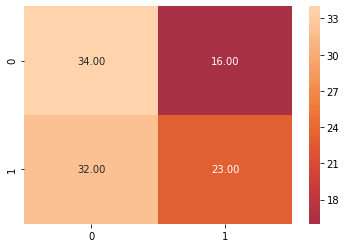

Naive Bayes
accuracy score: 53.33
RMS error: 0.68
F1-score:  [0.33 0.64]
precision score:  [0.52 0.54]
confusion matrix:
[[12 38]
 [11 44]]
run time: 0.01




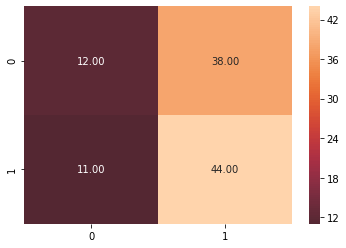

In [7]:
'''Training different classifiers'''
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingClassifier

for name, clf in zip(names, classifiers):
    tic = time.time()
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    toc = time.time()
    print(name)
    print("accuracy score: %.2f"%(accuracy_score(y_test, pred)*100))
    print("RMS error: %.2f"%(np.sqrt(mean_squared_error(y_test, pred))))
    print("F1-score: ", np.around(f1_score(y_test, pred, average=None), 2))
    print('precision score: ',np.around(precision_score(y_test, pred, average=None), 2))
    print("confusion matrix:")
    matrix = confusion_matrix(y_test, pred)
    print(matrix)
    sns.heatmap(matrix,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
    print("run time: %.2f"% (toc-tic))
    print('\n')
    plt.show()

# Case2: Training classifiers with selected features

In [8]:
path_to_file = "FeaturesValues.xlsx"
Sdata = pd.read_excel(path_to_file, header = 2)
print(Sdata.shape)
Sdata.head()

(350, 26)


,Label,10-12500,500-1000,1000-1500,7500-8000,10-12500.1,500-1000.1,1000-1500.1,7500-8000.1,10-12500.2,...,7500-8000.3,10-12500.4,10-12500.5,500-1000.4,500-1000.5,1000-1500.4,1000-1500.5,7500-8000.4,7500-8000.5,PenType
0,0,16.320440,16.320440,7.398460,2.012775,7.423021,3.721272,1.460425,0.875289,22.619635,...,0.789872,0.825667,15.671709,0.122235,7.564780,0.509929,3.430779,0.085417,1.665161,M4
1,0,59.265753,59.265753,4.586654,1.650161,12.452657,8.518008,1.676704,0.587340,28.854146,...,0.186056,1.186097,23.719217,1.594081,15.441935,0.764726,4.118134,0.401284,0.773396,M4
2,0,22.154235,22.154235,11.387735,3.148665,9.549542,4.729822,2.103572,1.102044,14.716988,...,0.490615,1.684450,17.414634,1.714066,7.745578,0.202009,4.409152,0.611429,1.592659,M4
3,1,17.316986,15.316602,17.316986,4.190537,9.976401,2.851924,3.431755,1.216401,19.976927,...,0.292080,1.727819,18.224983,0.178184,5.882032,0.107414,6.970924,0.924322,1.508481,M4
4,1,10.101065,10.101065,5.519555,1.979642,4.513550,1.869357,1.128628,0.480537,33.964781,...,0.330239,9.288578,18.315677,5.398514,9.137228,2.522698,4.779955,0.150298,0.810776,M4


In [9]:
'''Feature selection'''

labels = Sdata.Label
types = Sdata.PenType

pcad = PCA(n_components=5, whiten=True).fit(Sdata.drop(['Label','PenType'],axis=1))
x = pcad.transform(Sdata.drop(['Label','PenType'],axis=1))

col_names = ['F1', 'F2', 'F3', 'F4', 'F5']
X = pd.DataFrame(x, columns=col_names)
# X['Label'] = labels
X.insert(0, 'Label', labels)
X['PenType'] = types
X.head()

,Label,F1,F2,F3,F4,F5,PenType
0,0,-0.761769,-0.253958,0.504248,0.232560,-0.031223,M4
1,0,-0.491953,0.322962,0.632045,0.514776,0.536303,M4
2,0,-0.778265,-0.092871,0.173507,0.199732,0.265123,M4
3,1,-0.766804,-0.229548,0.045789,-0.127552,0.080300,M4
4,1,-0.669304,-0.541593,0.287779,0.292161,0.685649,M4


In [10]:
target_2 = X['Label']
features_2 = X.drop(['Label','PenType'], axis=1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, test_size = 0.3, random_state=1)
print("shape of training features:",x_train_2.shape)
print("shape of training labels:",y_train_2.shape)
print("shape of test features:",x_test_2.shape)
print("shape of test labels:",y_test_2.shape)

shape of training features: (245, 5)
shape of training labels: (245,)
shape of test features: (105, 5)
shape of test labels: (105,)


K Nearest Neighbors
accuracy score: 51.43
RMS error: 0.70
F1-score:  [0.52 0.5 ]
precision score:  [0.49 0.54]
recall score:  [0.56 0.47]
confusion matrix:
[[28 22]
 [29 26]]
run time: 0.01




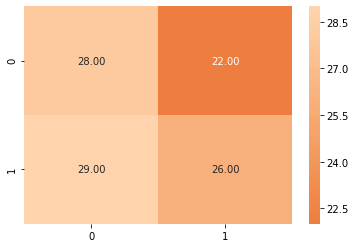

Linear SVM
accuracy score: 47.62
RMS error: 0.72
F1-score:  [0.63 0.1 ]
precision score:  [0.47 0.5 ]
recall score:  [0.94 0.05]
confusion matrix:
[[47  3]
 [52  3]]
run time: 0.01




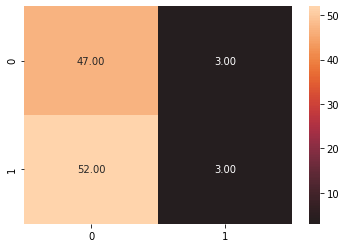

RBF SVM
accuracy score: 56.19
RMS error: 0.66
F1-score:  [0.59 0.53]
precision score:  [0.53 0.6 ]
recall score:  [0.66 0.47]
confusion matrix:
[[33 17]
 [29 26]]
run time: 0.01




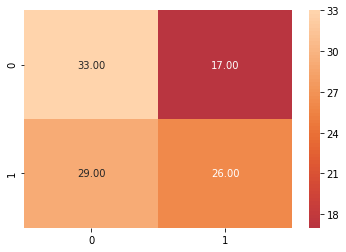

Gaussian Process
accuracy score: 55.24
RMS error: 0.67
F1-score:  [0.54 0.56]
precision score:  [0.53 0.58]
recall score:  [0.56 0.55]
confusion matrix:
[[28 22]
 [25 30]]
run time: 0.58




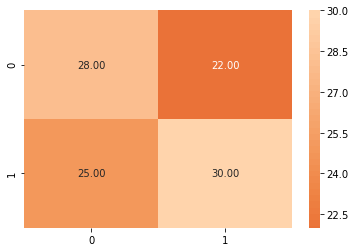

Decision Tree
accuracy score: 60.00
RMS error: 0.63
F1-score:  [0.46 0.68]
precision score:  [0.64 0.58]
recall score:  [0.36 0.82]
confusion matrix:
[[18 32]
 [10 45]]
run time: 0.01




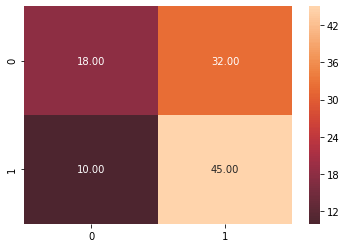

Random Forest
accuracy score: 54.29
RMS error: 0.68
F1-score:  [0.61 0.45]
precision score:  [0.51 0.61]
recall score:  [0.74 0.36]
confusion matrix:
[[37 13]
 [35 20]]
run time: 0.03




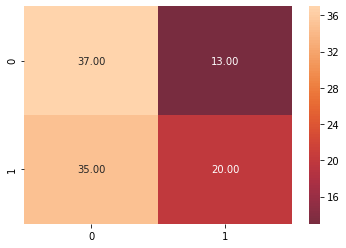

MLP Net
accuracy score: 47.62
RMS error: 0.72
F1-score:  [0.65 0.  ]
precision score:  [0.48 0.  ]
recall score:  [1. 0.]
confusion matrix:
[[50  0]
 [55  0]]
run time: 0.17


/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


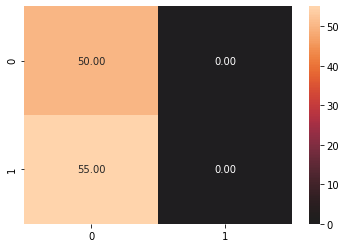

AdaBoost
accuracy score: 53.33
RMS error: 0.68
F1-score:  [0.56 0.51]
precision score:  [0.51 0.57]
recall score:  [0.62 0.45]
confusion matrix:
[[31 19]
 [30 25]]
run time: 0.14




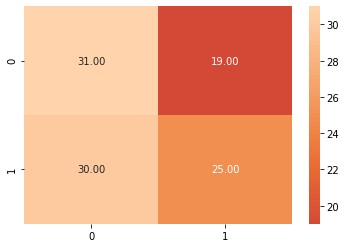

Naive Bayes
accuracy score: 48.57
RMS error: 0.72
F1-score:  [0.29 0.6 ]
precision score:  [0.42 0.51]
recall score:  [0.22 0.73]
confusion matrix:
[[11 39]
 [15 40]]
run time: 0.00




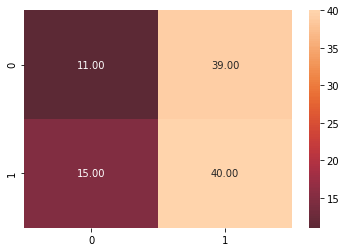

In [11]:
for name, clf in zip(names, classifiers):
    tic = time.time()
    clf.fit(x_train_2, y_train_2)
    pred_2 = clf.predict(x_test_2)
    toc = time.time()
    print(name)
    print("accuracy score: %.2f"%(accuracy_score(y_test_2, pred_2)*100))
    print("RMS error: %.2f"%(np.sqrt(mean_squared_error(y_test_2, pred_2))))
    print("F1-score: ", np.around(f1_score(y_test_2, pred_2, average=None), 2))
    print('precision score: ',np.around(precision_score(y_test_2, pred_2, average=None), 2))
    print('recall score: ', np.around(recall_score(y_test_2, pred_2, average=None), 2))
    print("confusion matrix:")
    matrix = confusion_matrix(y_test_2, pred_2)
    print(matrix)
    print("run time: %.2f"% (toc-tic))
    sns.heatmap(matrix,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
    print('\n')
    plt.show()

# Case3: Cross-validation and bagging

In [12]:
path_to_file = "FeaturesValues.xlsx"
CBdata = pd.read_excel(path_to_file, header = 2)
print(CBdata.shape)
CBdata.head()

(350, 26)


,Label,10-12500,500-1000,1000-1500,7500-8000,10-12500.1,500-1000.1,1000-1500.1,7500-8000.1,10-12500.2,...,7500-8000.3,10-12500.4,10-12500.5,500-1000.4,500-1000.5,1000-1500.4,1000-1500.5,7500-8000.4,7500-8000.5,PenType
0,0,16.320440,16.320440,7.398460,2.012775,7.423021,3.721272,1.460425,0.875289,22.619635,...,0.789872,0.825667,15.671709,0.122235,7.564780,0.509929,3.430779,0.085417,1.665161,M4
1,0,59.265753,59.265753,4.586654,1.650161,12.452657,8.518008,1.676704,0.587340,28.854146,...,0.186056,1.186097,23.719217,1.594081,15.441935,0.764726,4.118134,0.401284,0.773396,M4
2,0,22.154235,22.154235,11.387735,3.148665,9.549542,4.729822,2.103572,1.102044,14.716988,...,0.490615,1.684450,17.414634,1.714066,7.745578,0.202009,4.409152,0.611429,1.592659,M4
3,1,17.316986,15.316602,17.316986,4.190537,9.976401,2.851924,3.431755,1.216401,19.976927,...,0.292080,1.727819,18.224983,0.178184,5.882032,0.107414,6.970924,0.924322,1.508481,M4
4,1,10.101065,10.101065,5.519555,1.979642,4.513550,1.869357,1.128628,0.480537,33.964781,...,0.330239,9.288578,18.315677,5.398514,9.137228,2.522698,4.779955,0.150298,0.810776,M4


In [13]:

from sklearn import preprocessing

target_3 = X['Label']
features_3 = preprocessing.normalize(X.drop(['Label','PenType'], axis=1))

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(features_3, target_3, test_size = 0.3, random_state=1)
print("shape of training features:",x_train_3.shape)
print("shape of training labels:",y_train_3.shape)
print("shape of test features:",x_test_3.shape)
print("shape of test labels:",y_test_3.shape)

shape of training features: (245, 5)
shape of training labels: (245,)
shape of test features: (105, 5)
shape of test labels: (105,)


K Nearest Neighbors
accuracy score: 47.62
RMS error: 0.72
F1-score:  [0.47 0.49]
precision score:  [0.45 0.5 ]
confusion matrix:
[[24 26]
 [29 26]]
run time: 0.02
cross validation score:  [0.5        0.45714286 0.52857143 0.45714286 0.52857143]
mean cross validation score: 0.49428571428571433
cross validate fit_time : 0.001
cross validate score_time : 0.004
cross validate test_score : 0.469




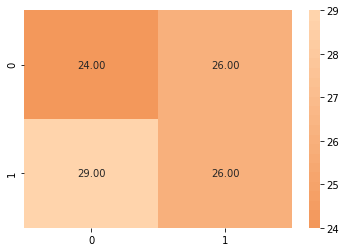

Linear SVM
accuracy score: 48.57
RMS error: 0.72
F1-score:  [0.61 0.25]
precision score:  [0.48 0.53]
confusion matrix:
[[42  8]
 [46  9]]
run time: 0.02
cross validation score:  [0.55714286 0.52857143 0.5        0.44285714 0.55714286]
mean cross validation score: 0.5171428571428571
cross validate fit_time : 0.003
cross validate score_time : 0.001
cross validate test_score : 0.488




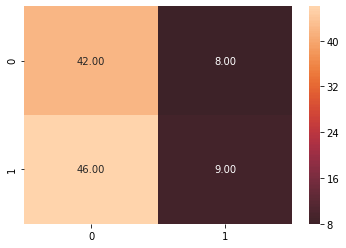

RBF SVM
accuracy score: 53.33
RMS error: 0.68
F1-score:  [0.64 0.33]
precision score:  [0.51 0.67]
confusion matrix:
[[44  6]
 [43 12]]
run time: 0.07
cross validation score:  [0.48571429 0.51428571 0.45714286 0.52857143 0.45714286]
mean cross validation score: 0.4885714285714286
cross validate fit_time : 0.007
cross validate score_time : 0.002
cross validate test_score : 0.474




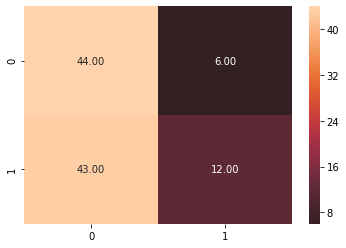

Gaussian Process
accuracy score: 44.76
RMS error: 0.74
F1-score:  [0.52 0.36]
precision score:  [0.44 0.46]
confusion matrix:
[[31 19]
 [39 16]]
run time: 8.17
cross validation score:  [0.44285714 0.47142857 0.55714286 0.48571429 0.37142857]
mean cross validation score: 0.46571428571428575
cross validate fit_time : 0.940
cross validate score_time : 0.003
cross validate test_score : 0.480




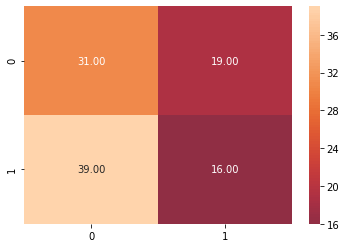

Decision Tree
accuracy score: 52.38
RMS error: 0.69
F1-score:  [0.54 0.51]
precision score:  [0.5  0.55]
confusion matrix:
[[29 21]
 [29 26]]
run time: 0.04
cross validation score:  [0.44285714 0.68571429 0.6        0.35714286 0.42857143]
mean cross validation score: 0.5028571428571429
cross validate fit_time : 0.004
cross validate score_time : 0.002
cross validate test_score : 0.520




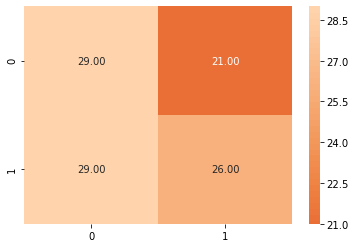

Random Forest
accuracy score: 52.38
RMS error: 0.69
F1-score:  [0.55 0.49]
precision score:  [0.5  0.56]
confusion matrix:
[[31 19]
 [31 24]]
run time: 0.13
cross validation score:  [0.55714286 0.54285714 0.6        0.51428571 0.48571429]
mean cross validation score: 0.54
cross validate fit_time : 0.010
cross validate score_time : 0.002
cross validate test_score : 0.478




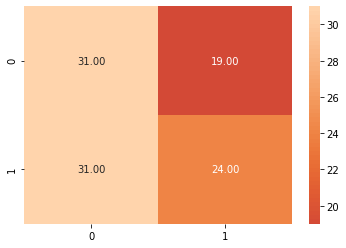

MLP Net
accuracy score: 47.62
RMS error: 0.72
F1-score:  [0.65 0.  ]
precision score:  [0.48 0.  ]
confusion matrix:
[[50  0]
 [55  0]]
run time: 1.41


/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


cross validation score:  [0.54285714 0.42857143 0.44285714 0.44285714 0.47142857]
mean cross validation score: 0.46571428571428564
cross validate fit_time : 0.094
cross validate score_time : 0.002
cross validate test_score : 0.511




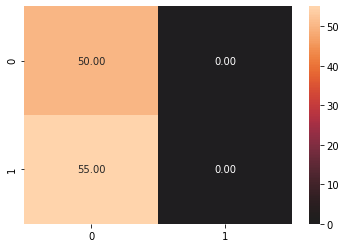

AdaBoost
accuracy score: 50.48
RMS error: 0.70
F1-score:  [0.51 0.5 ]
precision score:  [0.48 0.53]
confusion matrix:
[[27 23]
 [29 26]]
run time: 0.62
cross validation score:  [0.5        0.44285714 0.5        0.54285714 0.5       ]
mean cross validation score: 0.49714285714285716
cross validate fit_time : 0.059
cross validate score_time : 0.006
cross validate test_score : 0.491




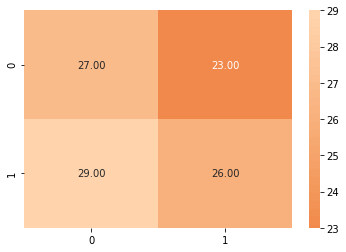

Naive Bayes
accuracy score: 49.52
RMS error: 0.71
F1-score:  [0.55 0.42]
precision score:  [0.48 0.53]
confusion matrix:
[[33 17]
 [36 19]]
run time: 0.03
cross validation score:  [0.41428571 0.44285714 0.62857143 0.45714286 0.55714286]
mean cross validation score: 0.5
cross validate fit_time : 0.002
cross validate score_time : 0.001
cross validate test_score : 0.440




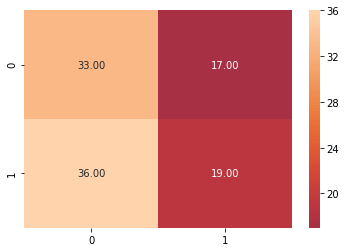

In [14]:
'''Training different classifiers'''

for name, clf in zip(names, classifiers):
    
    tic = time.time()
    bagging = BaggingClassifier(clf)
    bagging.fit(x_train_3, y_train_3)
    bag_pred = bagging.predict(x_test_3)
    toc = time.time()
    print(name)
    print("accuracy score: %.2f"%(accuracy_score(y_test_3, bag_pred)*100))
    print("RMS error: %.2f"%(np.sqrt(mean_squared_error(y_test_3, bag_pred))))
    print("F1-score: ", np.around(f1_score(y_test_3, bag_pred, average=None), 2))
    print('precision score: ',np.around(precision_score(y_test_3, bag_pred, average=None), 2))
    print("confusion matrix:")
    matrix_2 = confusion_matrix(y_test_3, bag_pred)
    print(matrix_2)
    print("run time: %.2f"% (toc-tic))
    R2 = cross_val_score(clf, features_3, y=target_3, cv=KFold(5,True), n_jobs=1)
    print("cross validation score: ", R2)
    print("mean cross validation score:", R2.mean())
    test = cross_validate(clf, features_3, target_3, cv=5)
    pred = cross_val_predict(clf, features_3, target_3, cv=5)
    keys = list(test.keys())
    values = list(test.values())
    print("cross validate %s : %.3f"%(keys[0], values[0].mean()))
    print("cross validate %s : %.3f"%(keys[1], values[1].mean()))
    print("cross validate %s : %.3f"%(keys[2], values[2].mean()))
    
    sns.heatmap(matrix_2,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
    print('\n')
    plt.show()

Authors:

Shravanthi Arvind Patil <br>
Sreenivasa Hikkal Venugopala